In [5]:
import pandas as pd


df = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Month-Year'] = df['Order Date'].dt.to_period('M').astype(str)

print(df.isnull().sum())

df.to_csv('Superstore_Cleaned.csv', index=False)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Month-Year       0
dtype: int64


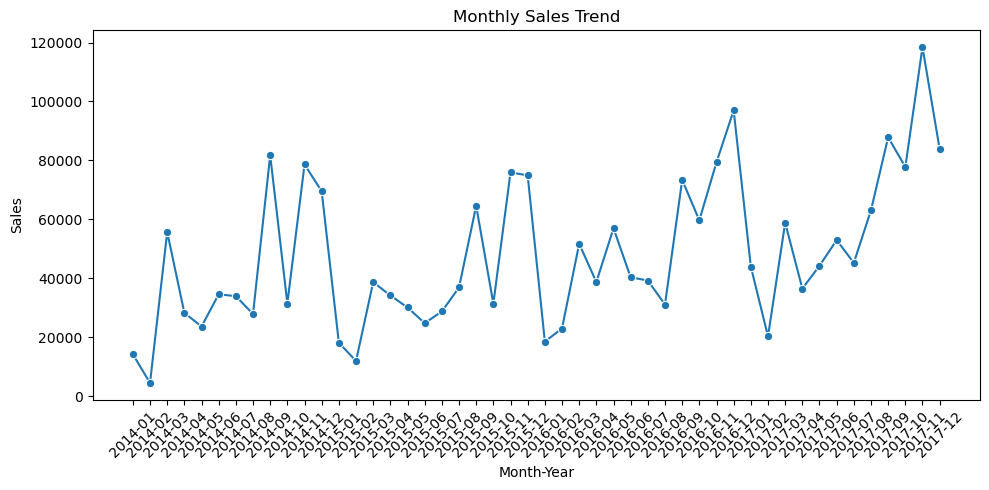

C:\Users\ayush\AppData\Local\Temp\ipykernel_1684\15540542.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='Region', y='Sales', palette='viridis')


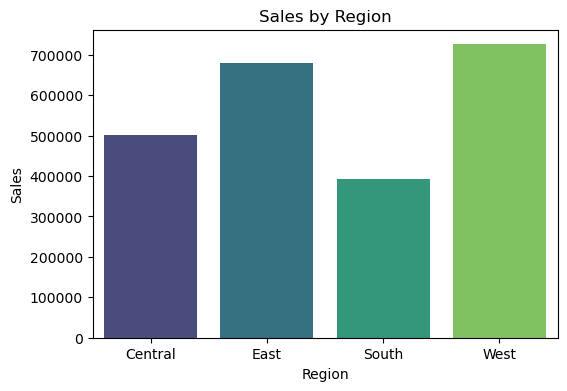

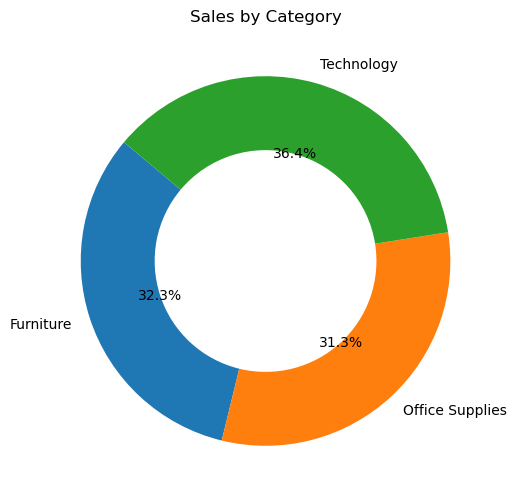

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data
monthly_sales = df.groupby('Month-Year')['Sales'].sum().reset_index()
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Line Chart: Sales over Months
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Month-Year', y='Sales', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.tight_layout()
plt.show()

# Bar Chart: Sales by Region
plt.figure(figsize=(6,4))
sns.barplot(data=region_sales, x='Region', y='Sales', palette='viridis')
plt.title('Sales by Region')
plt.show()

# Donut Chart: Sales by Category
plt.figure(figsize=(6,6))
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title('Sales by Category')
plt.show()
